# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [161]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/Users/magnesium/Documents/Light House Labs Bootcamp/Projects/Deployment Project/deployment_project/data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [162]:
# count the number of missing values in each column
num_missing = df.isnull().sum()
print(num_missing)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [163]:
# compute the mean and median for each feature
mean = df.mean()
median = df.median()

# print the results
print('Mean values:\n', mean)
print('\nMedian values:\n', median)

Mean values:
 ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

Median values:
 ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64


/var/folders/2d/bqz04hdj23l8m45654zxfnl80000gn/T/ipykernel_16043/274032860.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
/var/folders/2d/bqz04hdj23l8m45654zxfnl80000gn/T/ipykernel_16043/274032860.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()


Look at some basic statistics for numerical variables.

In [164]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [165]:
# count the number of unique values in each column
unique_counts = df.nunique()

# print the unique counts for each column
print(unique_counts)

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [166]:
# identify the nominal columns in the DataFrame
nominal_cols = [col for col in df.columns if df[col].dtype == 'object']

# print the frequency of different categories in each nominal variable
for col in nominal_cols:
    print(df[col].value_counts())
    print()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



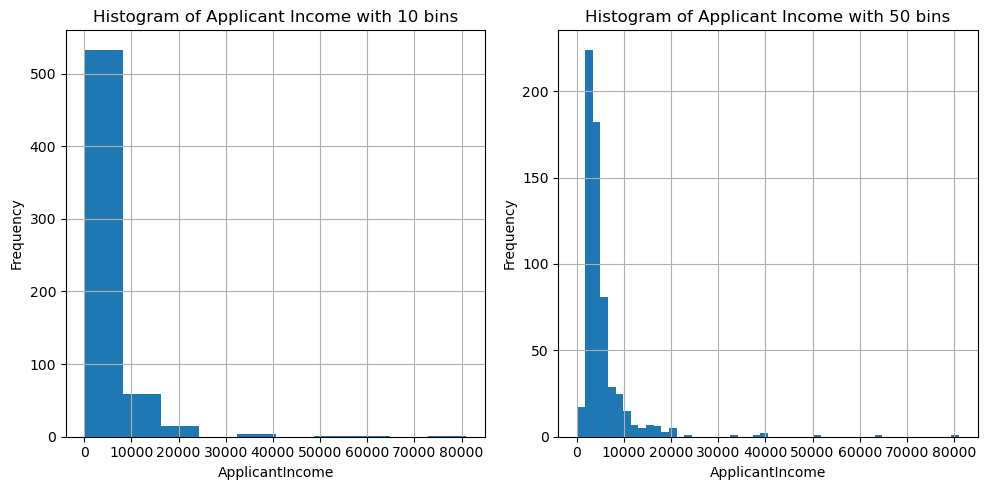

In [167]:
# plot histogram of ApplicantIncome with different numbers of bins
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['ApplicantIncome'].hist(bins=10)
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income with 10 bins')

plt.subplot(1, 2, 2)
df['ApplicantIncome'].hist(bins=50)
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income with 50 bins')

plt.tight_layout()
plt.show()


Look at box plots to understand the distributions. 

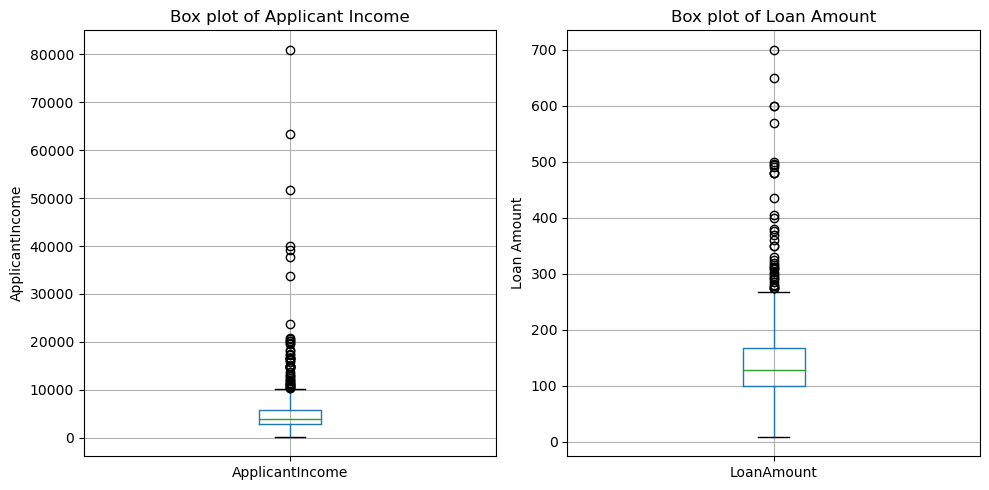

In [168]:
# plot box plots of Applicant Income and Loan Amount
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df.boxplot(column='ApplicantIncome')
plt.ylabel('ApplicantIncome')
plt.title('Box plot of Applicant Income')

plt.subplot(1, 2, 2)
df.boxplot(column='LoanAmount')
plt.ylabel('Loan Amount')
plt.title('Box plot of Loan Amount')

plt.tight_layout()
plt.show()

Look at the distribution of income segregated  by `Education`

<Figure size 1000x500 with 0 Axes>

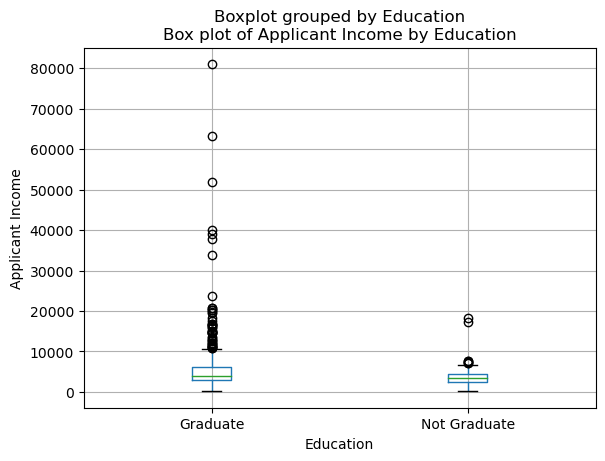

In [169]:
# plot box plot of Applicant Income by Education
plt.figure(figsize=(10, 5))
df.boxplot(column='ApplicantIncome', by='Education')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box plot of Applicant Income by Education')
plt.show()

Look at the histogram and boxplot of LoanAmount

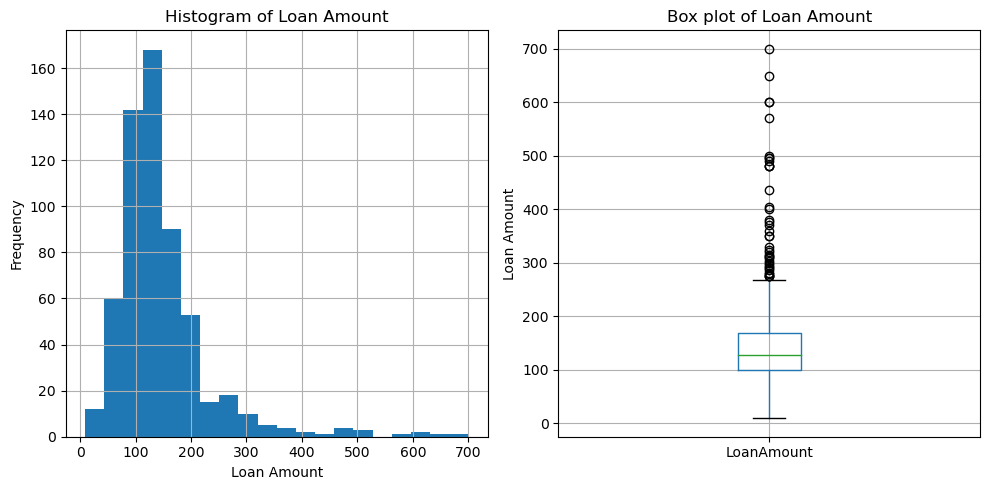

In [170]:
# plot histogram of Loan Amount
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['LoanAmount'].hist(bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')

# plot box plot of LoanAmount
plt.subplot(1, 2, 2)
df.boxplot(column='LoanAmount')
plt.ylabel('Loan Amount')
plt.title('Box plot of Loan Amount')

plt.tight_layout()
plt.show()

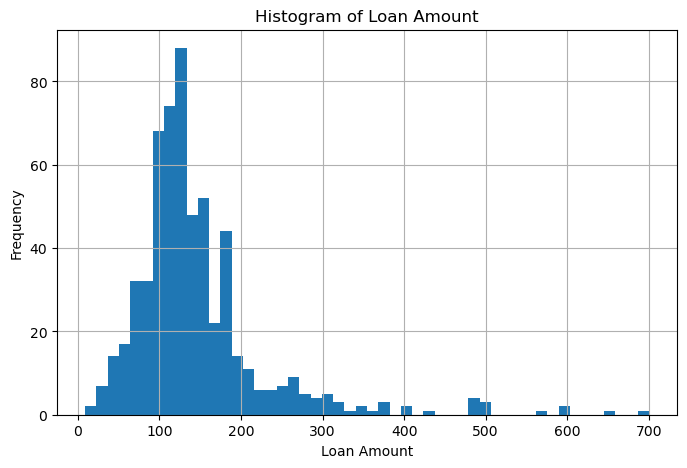

In [171]:
# plot histogram of Loan Amount
fig, ax = plt.subplots(figsize=(8,5))
df['LoanAmount'].hist(bins=50, ax=ax)
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Loan Amount')
plt.show()


There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [172]:
# create pivot table of Loan_Status by Credit_History
pivot = df.pivot_table(index='Credit_History', columns='Loan_Status', values='ApplicantIncome', aggfunc='count')
pivot

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


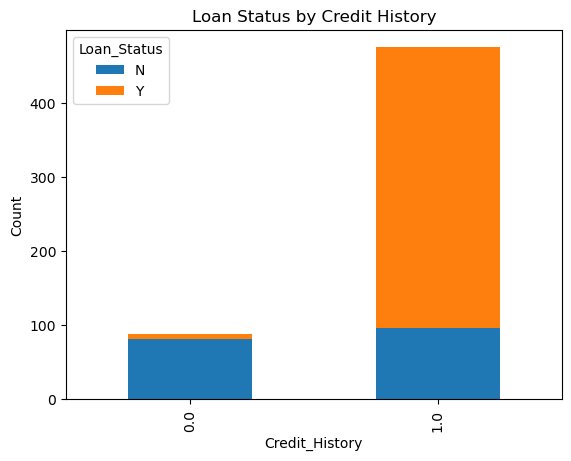

In [173]:
# plot stacked bar chart of Loan_Status by Credit_History
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Loan Status by Credit History')
plt.show()

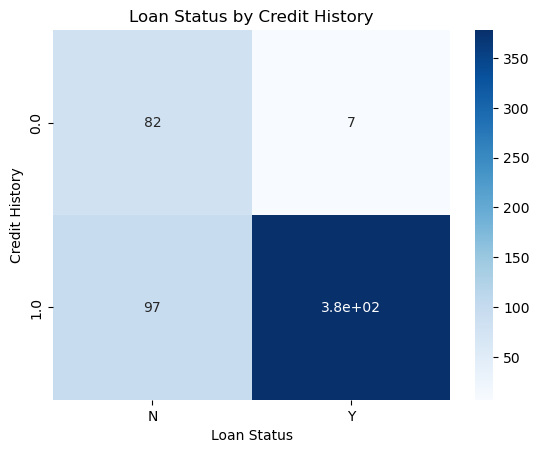

In [174]:
import seaborn as sns

sns.heatmap(pivot, annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Credit History')
plt.title('Loan Status by Credit History')
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [175]:
# impute missing values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [176]:
# impute missing values in numerical columns with median since they are postively skewed
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [177]:
# check for duplicates and drop if necessary 
duplicates = df[df.duplicated()]
duplicates

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [178]:
# drop missing rows with credit history as that is ciritical for loan approval
df = df.dropna(subset=['Credit_History'])

In [179]:
# Drop unnecessary columns not useful for prediction/analytics
df = df.drop(columns=["Loan_ID"])

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

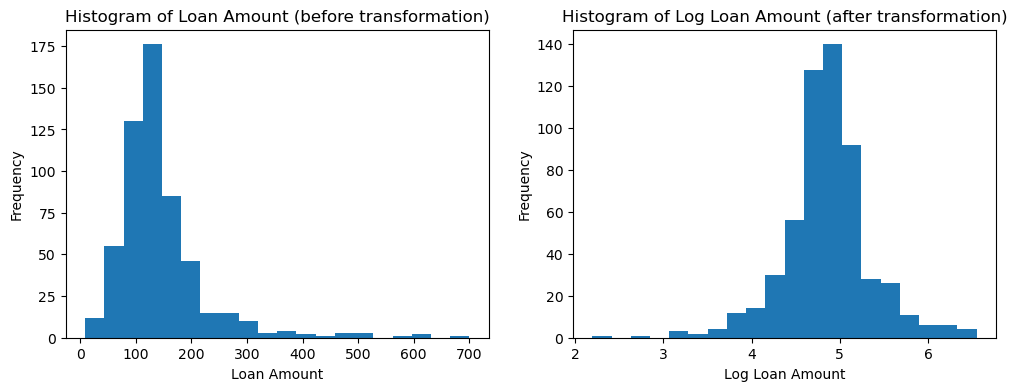

In [180]:
# Create a copy of the dataframe to run the log transformation
df_log = df.copy()

# Apply log transformation to LoanAmount
df_log['LoanAmount_log'] = np.log(df_log['LoanAmount'])

# Plot histograms before and after transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram before transformation
ax[0].hist(df_log['LoanAmount'].dropna(), bins=20)
ax[0].set_xlabel('Loan Amount')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Loan Amount (before transformation)')

# Histogram after transformation
ax[1].hist(df_log['LoanAmount_log'].dropna(), bins=20)
ax[1].set_xlabel('Log Loan Amount')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Log Loan Amount (after transformation)')

plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [181]:
# Create a copy of the dataframe to run the log transformation
df_log_2 = df_log.copy()

# Combine incomes as total income
df_log_2['TotalIncome'] = df_log_2['ApplicantIncome'] + df_log_2['CoapplicantIncome']

# Take log transformation of total income
df_log_2['TotalIncome_log'] = np.log(df_log_2['TotalIncome'])

# Display first few rows of the transformed data to make sure it worked
print(df_log_2[['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome', 'TotalIncome_log']].head())

   ApplicantIncome  CoapplicantIncome  TotalIncome  TotalIncome_log
0             5849                0.0       5849.0         8.674026
1             4583             1508.0       6091.0         8.714568
2             3000                0.0       3000.0         8.006368
3             2583             2358.0       4941.0         8.505323
4             6000                0.0       6000.0         8.699515


## 4. Building a Predictive Model

In [182]:
# Convert categorical variables to numeric
df_log_2["Gender"] = df_log_2["Gender"].map({"Male": 0, "Female": 1, "Unknown": 2})
df_log_2["Married"] = df_log_2["Married"].map({"No": 0, "Yes": 1, "Unknown": 2})
df_log_2["Dependents"] = df_log_2["Dependents"].replace("3+", 3)
df_log_2["Education"] = df_log_2["Education"].map({"Not Graduate": 0, "Graduate": 1})
df_log_2["Self_Employed"] = df_log_2["Self_Employed"].map({"No": 0, "Yes": 1, "Unknown": 2})
df_log_2["Property_Area"] = df_log_2["Property_Area"].map({"Rural": 0, "Semiurban": 1, "Urban": 2})
df_log_2["Loan_Status"] = df_log_2["Loan_Status"].map({"N": 0, "Y": 1})

In [183]:
# check datatype and update to numeric for dependents
print(df_log_2['Dependents'].dtype)
df_log_2['Dependents'] = pd.to_numeric(df_log_2['Dependents'], errors='coerce')

object


In [184]:
df_log_2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030,5849.0,8.674026
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [185]:
# Scale the data
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
#df_log_2 = pd.DataFrame(scaler.fit_transform(df_log_2), columns=df_log_2.columns)


In [186]:
# drop non log columns
df_model = df_log_2.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome'])

Try paramater grid search to improve the results

In [187]:
# drop the income columns to just work with the TotalIncome_log column
df_model

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,0,0,0,1,0,360.0,1.0,2,1,4.852030,8.674026
1,0,1,1,1,0,360.0,1.0,0,0,4.852030,8.714568
2,0,1,0,1,1,360.0,1.0,2,1,4.189655,8.006368
3,0,1,0,0,0,360.0,1.0,2,1,4.787492,8.505323
4,0,0,0,1,0,360.0,1.0,2,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,360.0,1.0,0,1,4.262680,7.972466
610,0,1,3,1,0,180.0,1.0,0,1,3.688879,8.320205
611,0,1,1,1,0,360.0,1.0,2,1,5.533389,9.025456
612,0,1,2,1,0,360.0,1.0,2,1,5.231109,8.933664


In [188]:
# Build and run an XGBoost model with GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_model.drop('Loan_Status', axis=1)
y = df_model['Loan_Status']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define pipeline steps
steps = [('classifier', XGBClassifier())]

# Create pipeline
pipe = Pipeline(steps)

# Define parameter grid
param_grid = {'classifier__n_estimators': [50, 100, 150, 200, 250],
              'classifier__max_depth': [1, 3, 5, 10, None],
              'classifier__learning_rate': [0.001, 0.01, 0.1, 1]}

# Instantiate GridSearchCV object
grid = GridSearchCV(pipe, param_grid, cv=5)

# Fit the pipeline to the training data
grid.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid.predict(X_test)

# Print the best hyperparameters and test accuracy score
print('Best parameters:', grid.best_params_)
print('Test accuracy score:', accuracy_score(y_test, y_pred))

# Calculate and print additional evaluation metrics
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('ROC-AUC score:', roc_auc_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))


Best parameters: {'classifier__learning_rate': 0.001, 'classifier__max_depth': 1, 'classifier__n_estimators': 50}
Test accuracy score: 0.831858407079646
Precision score: 0.8021978021978022
Recall score: 0.9864864864864865
F1 score: 0.8848484848484848
ROC-AUC score: 0.7624740124740125
Confusion matrix: [[21 18]
 [ 1 73]]


In [189]:
# Build and run a random forest model with GridSearchCV for camparison

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_model.drop('Loan_Status', axis=1), df_model['Loan_Status'], test_size=0.2, random_state=42)

# Define the model
rfc = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {'n_estimators': [50, 100, 150, 200, 250],
              'max_depth': [1, 3, 5, 10, None],
              'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

# Instantiate GridSearchCV object
grid = GridSearchCV(rfc, param_grid, cv=5)

# Fit the model using GridSearchCV
grid.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = grid.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Classifier Evaluation Metrics:")
print("Accuracy:", accuracy)
print('Best parameters:', grid.best_params_)

Results are the same so will make pipline with XGBoost as the model runs faster and more efficently.

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

Create pipeline to figure out best model to build prediction pipeline based on

In [191]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Encode the target variable
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Split features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Define the preprocessing pipelines for numerical and categorical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']),
    ('cat', cat_transformer, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'])
])

# Define the XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=3)

# Combine the preprocessing and modeling steps into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Print the test accuracy score
print('Test accuracy score:', accuracy_score(y_test, y_pred))

# Calculate and print additional evaluation metrics
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('ROC-AUC score:', roc_auc_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))




Test accuracy score: 0.7699115044247787
Precision score: 0.7926829268292683
Recall score: 0.8783783783783784
F1 score: 0.8333333333333334
ROC-AUC score: 0.7212404712404713
Confusion matrix: [[22 17]
 [ 9 65]]


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [192]:
# reinputing best model to save to pickle file for deployment

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define features and target variable
X = df_model.drop('Loan_Status', axis=1)
y = df_model['Loan_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost classifier with best hyperparameters
xgb = XGBClassifier(n_estimators=50, max_depth=1, learning_rate=0.001)

# Fit the classifier to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Print the test accuracy score
print('Test accuracy score:', accuracy_score(y_test, y_pred))

# Calculate and print additional evaluation metrics
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('ROC-AUC score:', roc_auc_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))


Test accuracy score: 0.831858407079646
Precision score: 0.8021978021978022
Recall score: 0.9864864864864865
F1 score: 0.8848484848484848
ROC-AUC score: 0.7624740124740125
Confusion matrix: [[21 18]
 [ 1 73]]


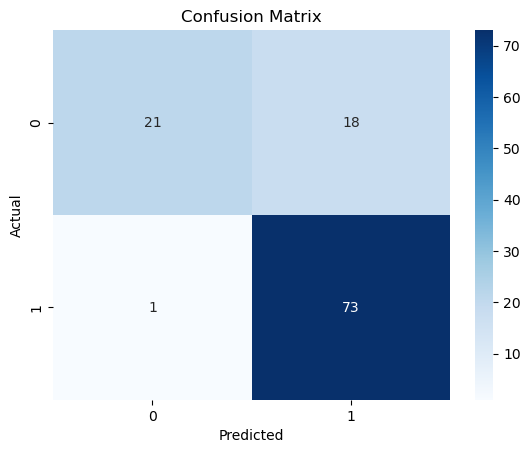

In [193]:
#plot confusion matrix for presentation graphics 
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [194]:
import pickle

# Define XGBoost classifier with best hyperparameters
xgb = XGBClassifier(n_estimators=50, max_depth=1, learning_rate=0.001)

# Fit the classifier to the training data
xgb.fit(X_train, y_train)

# Save the trained classifier to a pickle file
with open('xgb_classifier.pkl', 'wb') as f:
    pickle.dump(xgb, f)


In [ ]:
# Deployment via python

import requests

url = 'http://ec2-35-153-231-72.compute-1.amazonaws.com:5004/predict'
params = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '1',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'LoanAmount': 125,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 'Urban',
    'total_income': 2500
    }
response = requests.post(url = url,json=params)
print(response.json())

In [ ]:
# Also deployed via Bash with the following code:

